<h1 align="center">탐색적 분석 : 왕자의 게임</h1> 
  <img src=https://upload.wikimedia.org/wikipedia/en/d/d8/Game_of_Thrones_title_card.jpg>

역사상 가장 인기 있는 텔레비전 시리즈 중 하나인 '왕좌의 게임'은 수 많은 스토리와 등장인물들이 왕좌를 차지하기 위해 가상의 대률긴  웨스테로스(Westeros)’와 ‘에소스(Essos)를 배경으로 싸우는  판타지 드라마다. 조지 R. R. 마틴(George R. R. Martin)의 ‘얼음과 불의 노래’ 시리즈를 각색한 작품이다. 이 드라마는 데이터 과학자를 포함한 많은 사람의 관심을 끌었다. 탐색적 데이터 분석(EDA)을 제공하는 이 노트북은 캐글(Kaggle) 데이터 세트로 마일스 오닐(Myles O'Neill)이 좀 더 보강했다(더 자세한 내용은 https://www.kaggle.com/mylesoneill/game-of-thrones 참조). 이 데이터 세트는 여러 사람이 수집하고 기여한 여러 데이터 세트를 조합해서 만들어졌다. 앞으로의 분석에는 battle.csv를 활용한다. 원래 전투 데이터는 크리스 앨번(Chris Albon)이 제공했으며, 더 자세한 내용은 다음 URL에서 확인할 수 있다: https://github.com/chrisalbon/war_of_the_five_kings_dataset

---
위의 이미지는, HBO에서 저작권을 소유한 웹사이트  왕자의 게임에서 가져왔다.  왕좌의 게임과 관련 없이 이미지에 표시된 모든 상표와 등록 상표는 HBO의 소유이다. 저작권법의 공정한 거래 조항에 의거해 이미지를 사용했다.


In [7]:
%matplotlib inline

## 패키지 임포트

In [8]:
import numpy as np
import pandas as pd
from collections import Counter

# pandas display data frames as tables
from IPython.display import display, HTML

# plotting
import seaborn as sns
import matplotlib.pyplot as plt


# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)

## 데이터 세트 로드

분석을 위해 ```battles.csv``` 을 로드하는 단계다.

In [9]:
# 데이터 세트 로드
battles_df = pd.read_csv('battles.csv')

In [10]:
# Display sample rows
display(battles_df.head())

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## 가공하지 않은 속성 탐색

In [11]:
print("Number of attributes available in the dataset = {}".format(battles_df.shape[1]))

Number of attributes available in the dataset = 25


In [12]:
# 사용하려는 열과 관련 데이터 유형 보기
battles_df.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [13]:
# 숫자 열의 속성 분석
battles_df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


---

## 싸운 전투의 수
이 데이터는 **시즌 5** 까지만 있다.

In [14]:
print("Number of battles fought={}".format(battles_df.shape[0]))

Number of battles fought=38


## 여러 해에 걸친 전투
아래 그림을 통해 299년에 총 20회의 전투가 벌어졌으며 최대의 유혈 사태가 있었음을 알 수 있다.

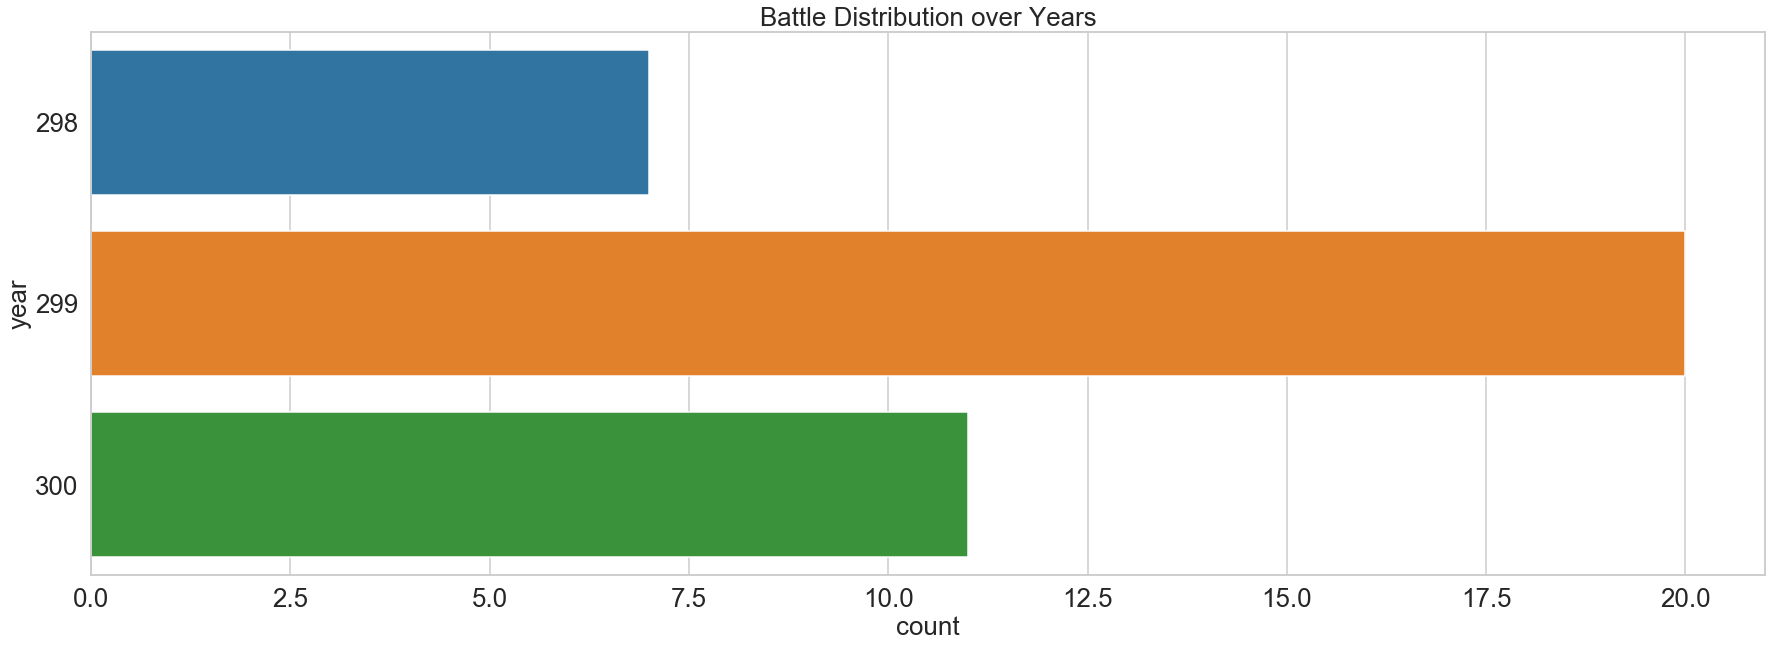

In [15]:
sns.countplot(y='year',data=battles_df)
plt.title('Battle Distribution over Years')
plt.show()

## 가장 많은 전투가 있었던 지역은?
<img src="https://racefortheironthrone.files.wordpress.com/2016/11/riverlands-political-map.jpg?w=580&h=781" alt="RiverLands" style="width: 200px;" align="left"/> **리버랜드(Riverland)* 에서 가장 많은 전투가 발생하고, 노스(The North)와 웨스터랜드(The Westerlands)가 그 뒤를 따르는 것을 확인할 수 있다. 주목할 만한 또 하나의 흥미로운 점은 장벽을 넘는 전투가 단 한 번 있었다는 것이다(스포일러 경고: 겨울이 다가오고 있다.)

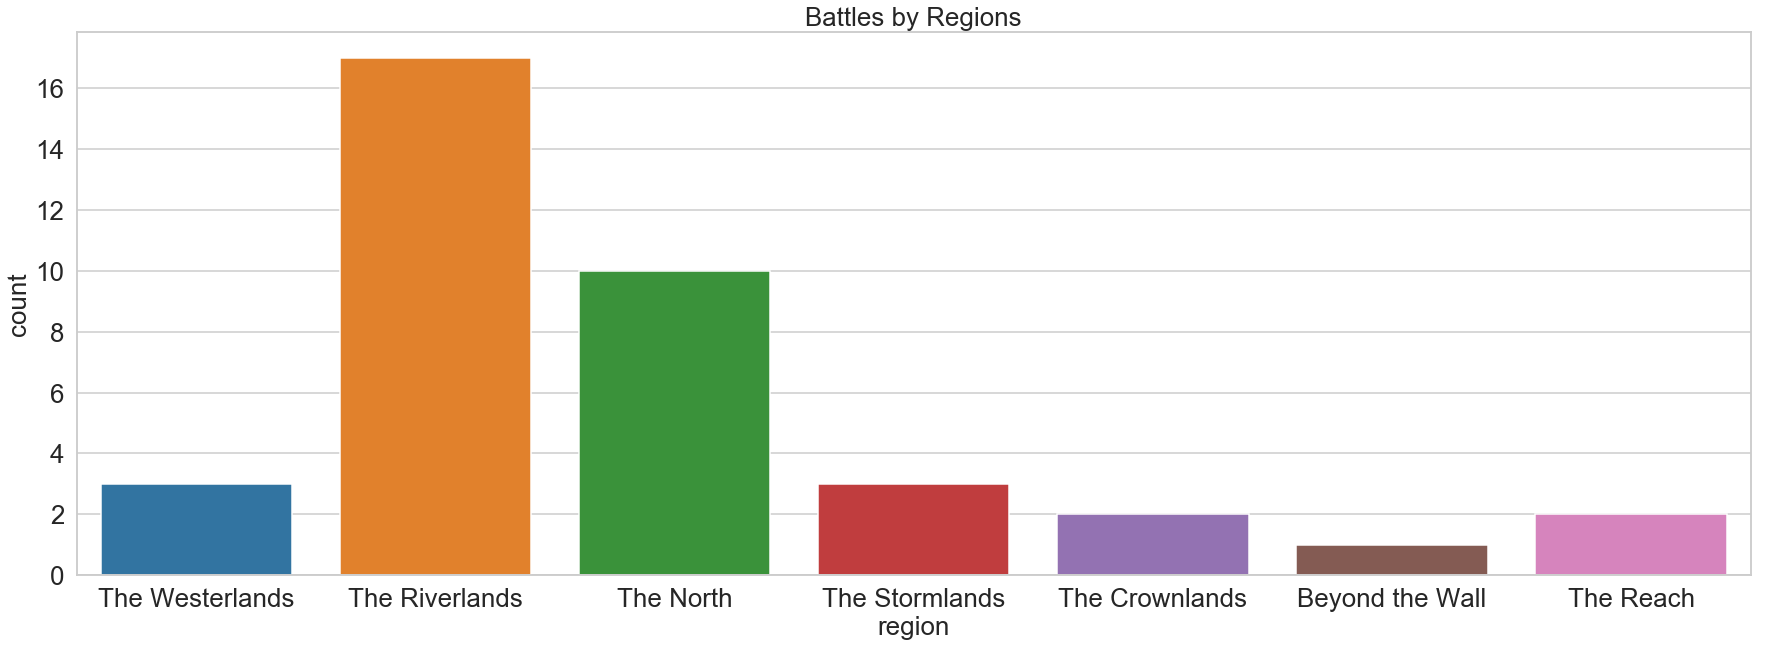

In [16]:
sns.countplot(x='region',data=battles_df)
plt.title('Battles by Regions')
plt.show()

### 지역별 주요 인물의 사망과 체포

리버랜드(Riverlands)에서 많은 주인공들이 죽거나 잡혔다는 것은 의심할 여지가 없다. '리치(Reach)' 에서도 두 번의 전추가 있었다고는 하나 주요 등장인물 중 죽거나 다친 사람이 있는 것 같지는 않다. 

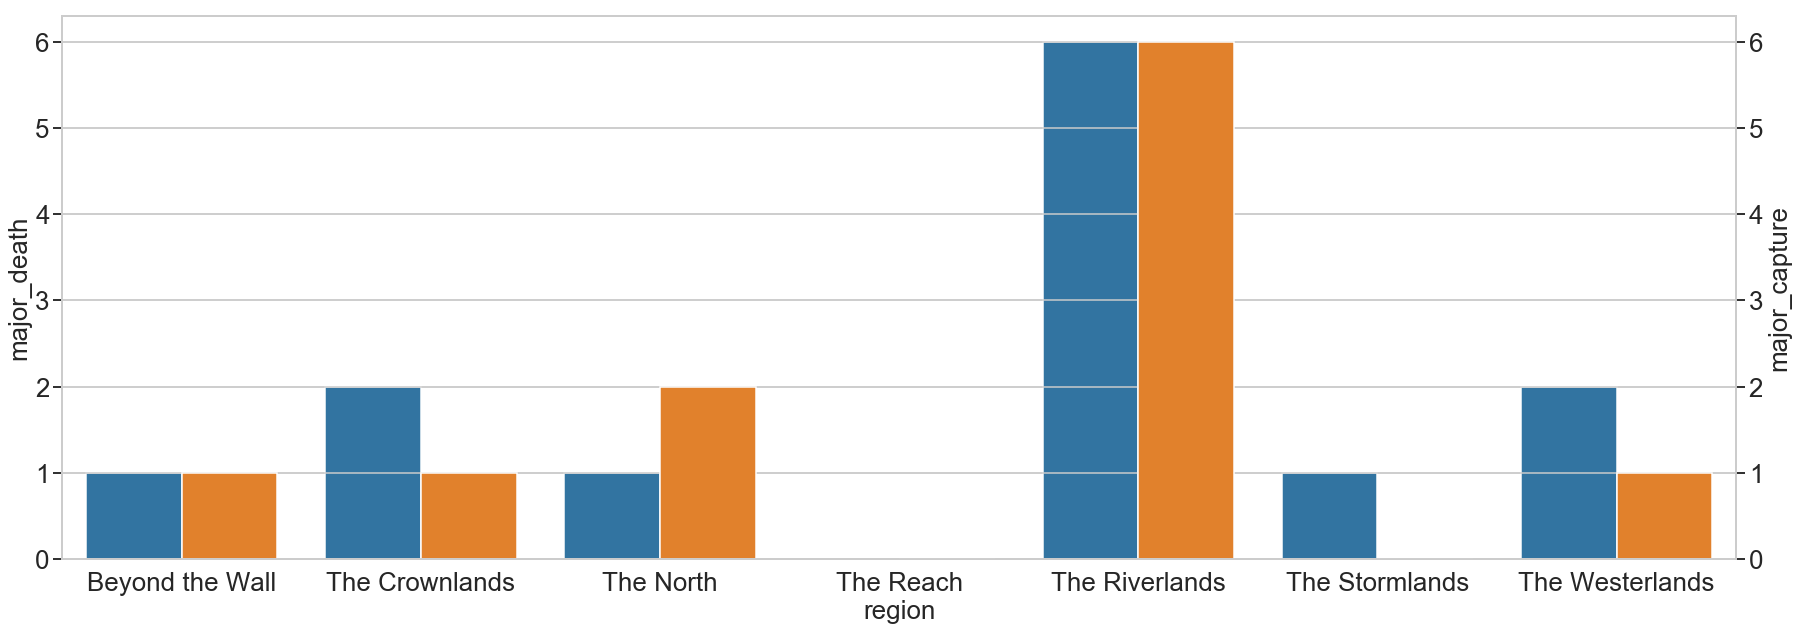

In [17]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()
temp_df = battles_df.groupby('region').agg({'major_death':'sum',
                                            'major_capture':'sum'}).reset_index()
temp_df.loc[:,'dummy'] = 'dummy'
sns.barplot(x="region", y="major_death", 
            hue='dummy', data=temp_df, 
            estimator = np.sum, ax = ax1, 
            hue_order=['dummy','other'])

sns.barplot(x="region", y="major_capture", 
            data=temp_df, hue='dummy',
            estimator = np.sum, ax = ax2, 
            hue_order=['other','dummy'])

ax1.legend_.remove()
ax2.legend_.remove()

## 누가 가장 많은 공격을 했는가?
바라테온 가문이 공격하는 것을 좋아해서 38% 로 선두를 달리고 있고 로브 스타크(Robb Stark)가 27.8%로 2위다.

<img src="https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/Joffrey_Season_4_Episode_2_TLATR.jpg/revision/latest?cb=20190418203833" alt="joffrey" style="width: 200px;" align="left"/>  <img src="https://meninblazers.com/.image/t_share/MTMwMDE5NTU4NTI5NDk1MDEw/tumblr_mkzsdafejy1r2xls3o1_400.png" alt="robb" style="width: 200px; height: 200px" align="right"/>

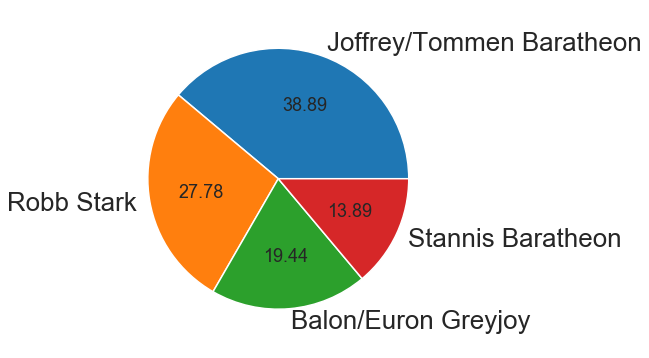

In [18]:
attacker_king = battles_df.attacker_king.value_counts()
attacker_king.name='' # turn off annoying y-axis-label
attacker_king.plot.pie(figsize=(6, 6),autopct='%.2f')

## 가장 많이 방어한 사람은 누구일까?
롭 스파크(Rob Stark)s와 바라테온의 형제들(Baratheon boys)이 다시 정상에 올랐다.  보아하니 이 둘은 여러번 전쟁에서 상대편에 섰었던 것 같다.

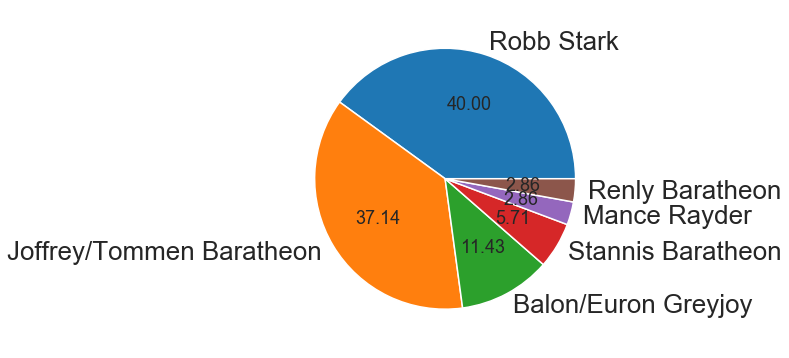

In [19]:
defender_king = battles_df.defender_king.value_counts()
defender_king.name='' # turn off annoying y-axis-label
defender_king.plot.pie(figsize=(6, 6),autopct='%.2f')

## ## 전투 스타일의 분포
전역에서 많은 전투가 벌어졌지만 웨스테로스(Westeros)와 에소스(Essos)가 아직 가장 큰 영예를 안고 있다. 다음 그림의 분포를 통해
**대회전(pitched battle)** 이 가장 일반적인 전투 스타일이었음을 알 수 있다.

(옮긴이) 대회전(pitched battle), 특정한 시간에 일정한 장소에 모여서 벌이는 전투), ambush(매복), siege(포위), razing (파괴)등이 포함된다.

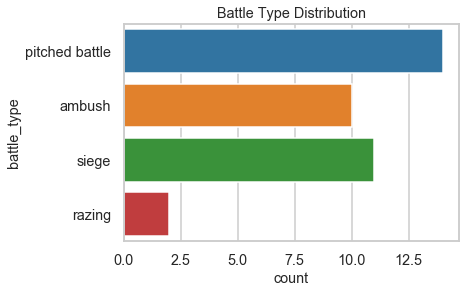

In [13]:
sns.countplot(y='battle_type',data=battles_df)
plt.title('Battle Type Distribution')
plt.show()

## 공격인가 방어인가?

웨스테로스(Westeros)에서 방어는 쉽지 않지 않다. 37번의 전투 중 32번은 공격자들이 승리했다는 사실을 통해 이를 명백하게 알 수 있다.

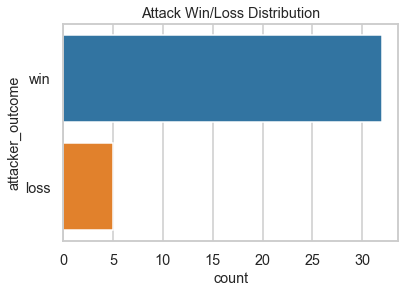

In [14]:
sns.countplot(y='attacker_outcome',data=battles_df)
plt.title('Attack Win/Loss Distribution')
plt.show()

## 승자
스타크(Starks)의 열혈팬을 제외하고 패자를 기억할 사람이 있을까?

다음은 누가 얼마나 많은 전투에서 공격과 방어에 성공했는지 알려주는 플롯이다.

In [20]:
attack_winners = battles_df[battles_df.attacker_outcome=='win']['attacker_king'].value_counts().reset_index()
attack_winners.rename(columns={'index':'king','attacker_king':'wins'},inplace=True)
attack_winners.loc[:,'win_type'] = 'attack'

defend_winners = battles_df[battles_df.attacker_outcome=='loss']['defender_king'].value_counts().reset_index()
defend_winners.rename(columns={'index':'king','defender_king':'wins'},inplace=True)
defend_winners.loc[:,'win_type'] = 'defend'                                                                     

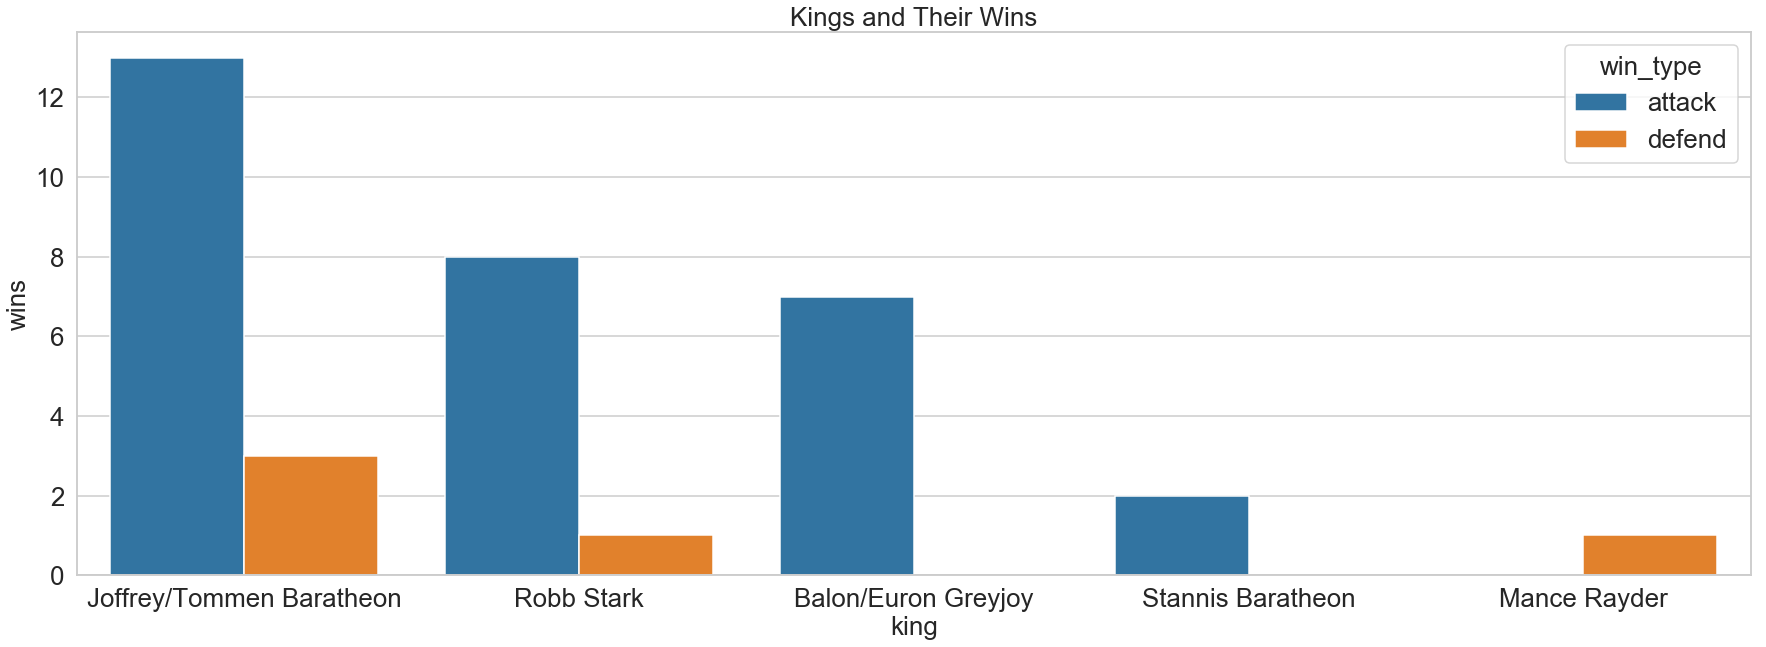

In [21]:
sns.barplot(x="king", y="wins", hue="win_type", data=pd.concat([attack_winners,defend_winners]))
plt.title('Kings and Their Wins')
plt.ylabel('wins')
plt.xlabel('king')
plt.show()

## 전투 사령부
전투는 힘뿐만 아니라 두뇌전이다.

다음은 공격과 수비에 참여한 지휘관 수의 분포이다.

In [17]:
battles_df['attack_commander_count'] = battles_df.dropna(subset=['attacker_commander']).apply(lambda row: len(row['attacker_commander'].split()),axis=1)
battles_df['defend_commander_count'] = battles_df.dropna(subset=['defender_commander']).apply(lambda row: len(row['defender_commander'].split()),axis=1)

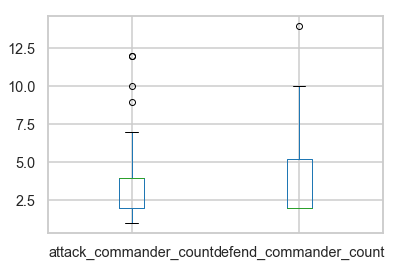

In [18]:
battles_df[['attack_commander_count',
            'defend_commander_count']].plot(kind='box')

## 얼마나 많은 가문이 전투에 참여했는가?

어느 정도 균형이 잡힌 전투였는가? 다음 플롯을 통해 전체 이야기를 볼 수 있다.

<img src="https://c1.staticflickr.com/4/3893/14834104277_54d309b4ca_b.jpg" style="height: 200px;"/>

In [22]:
battles_df['attacker_house_count'] = (4 - battles_df[['attacker_1', 
                                                'attacker_2', 
                                                'attacker_3', 
                                                'attacker_4']].isnull().sum(axis = 1))

battles_df['defender_house_count'] = (4 - battles_df[['defender_1',
                                                'defender_2', 
                                                'defender_3', 
                                                'defender_4']].isnull().sum(axis = 1))

battles_df['total_involved_count'] = battles_df.apply(lambda row: row['attacker_house_count']+row['defender_house_count'],
                                                      axis=1)
battles_df['bubble_text'] = battles_df.apply(lambda row: '{} had {} house(s) attacking {} house(s) '.format(row['name'],
                                                                                                            row['attacker_house_count'],
                                                                                                            row['defender_house_count']),
                                             axis=1)

## 전투의 불균형
금까지 대부분의 전투는 공격하면서 동맹을 맺은 가문들이다. 공격을 받을 때는 친구가 많지 않다.

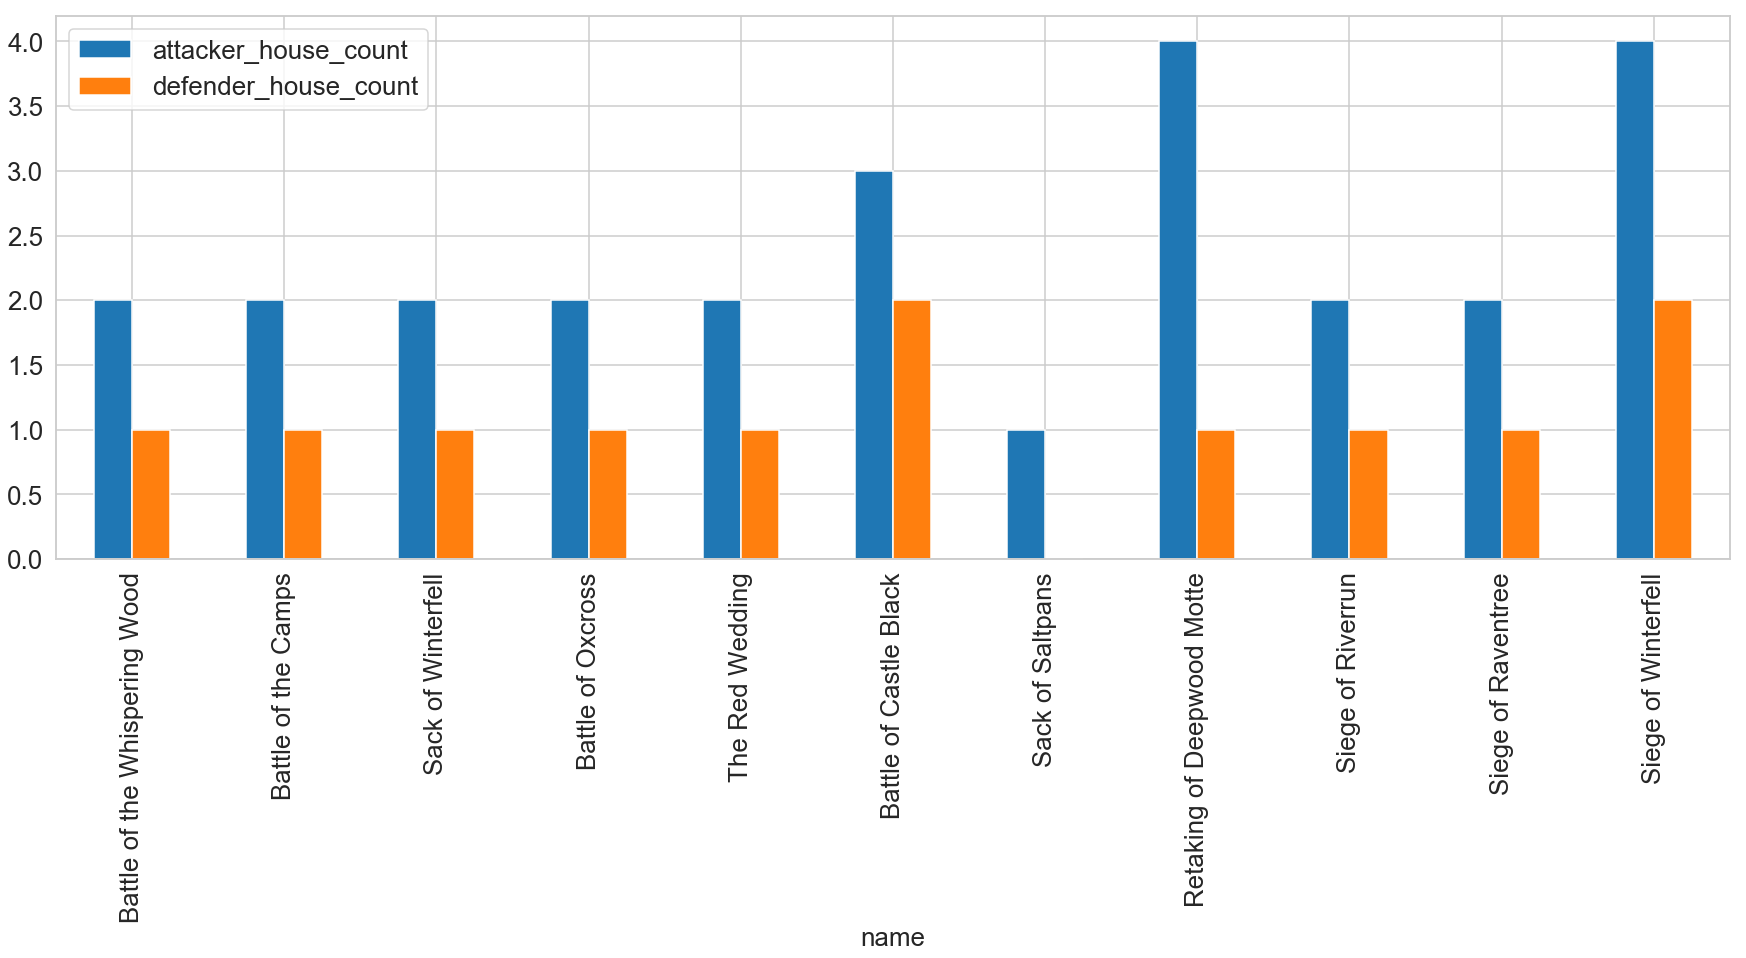

In [23]:
house_balance = battles_df[battles_df.attacker_house_count != battles_df.defender_house_count][['name',
                                                                                'attacker_house_count',
                                                                                'defender_house_count']].set_index('name')
house_balance.plot(kind='bar')

## 전투와 참여 군인의 수

공격자들이 기회를 바라기만 한 것은 아니고 엄청난 인원을 동원해 전투에 참여했다. 경계심을 늦추면 안된다.

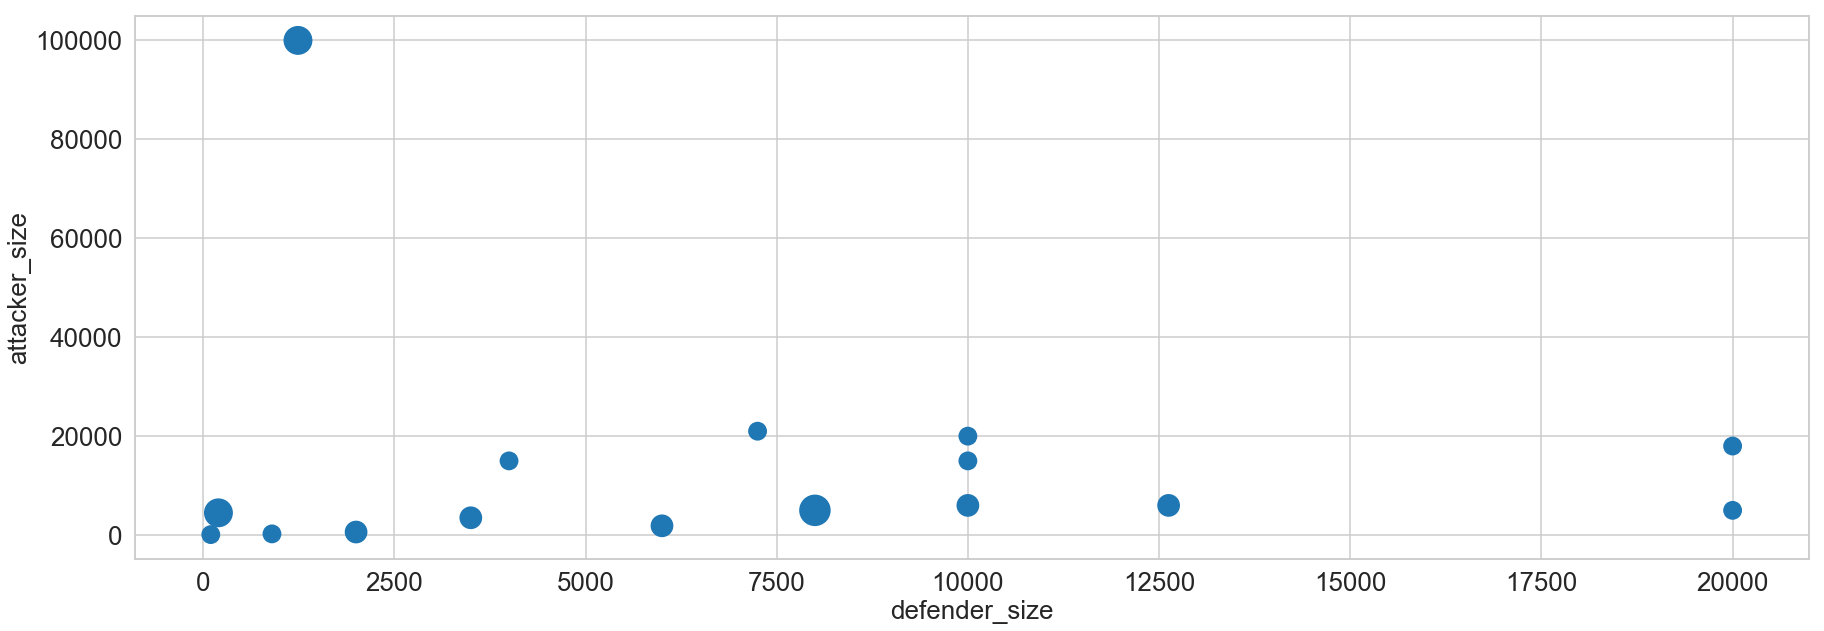

In [24]:
army_size_df = battles_df.dropna(subset=['total_involved_count',
                          'attacker_size',
                          'defender_size',
                         'bubble_text'])
army_size_df.plot(kind='scatter', x='defender_size',y='attacker_size',
                  s=army_size_df['total_involved_count']*150)

## 대적(大敵, Archenemies)?

스타크와 바라테온(Stark-Baratheon)의 우정은 19 번의 전투와 전술로 완전히 유턴했다. 실제로 이들의 땅에 믿을 믿을만한 사람은 없다.

In [25]:
temp_df = battles_df.dropna(subset = ["attacker_king", 
                                      "defender_king"])[[
                                                    "attacker_king", 
                                                    "defender_king"
                                                        ]]

archenemy_df = pd.DataFrame(list(Counter([tuple(set(king_pair)) 
                                          for king_pair in temp_df.values 
                                          if len(set(king_pair))>1]).items()),
                              columns=['king_pair','battle_count'])

archenemy_df['versus_text'] = archenemy_df.apply(lambda row:
                                                 '{} Vs {}'.format(
                                                     row['king_pair'][0], 
                                                     row['king_pair'][1]),
                                                 axis=1)
archenemy_df.sort_values('battle_count',
                         inplace=True,
                         ascending=False)

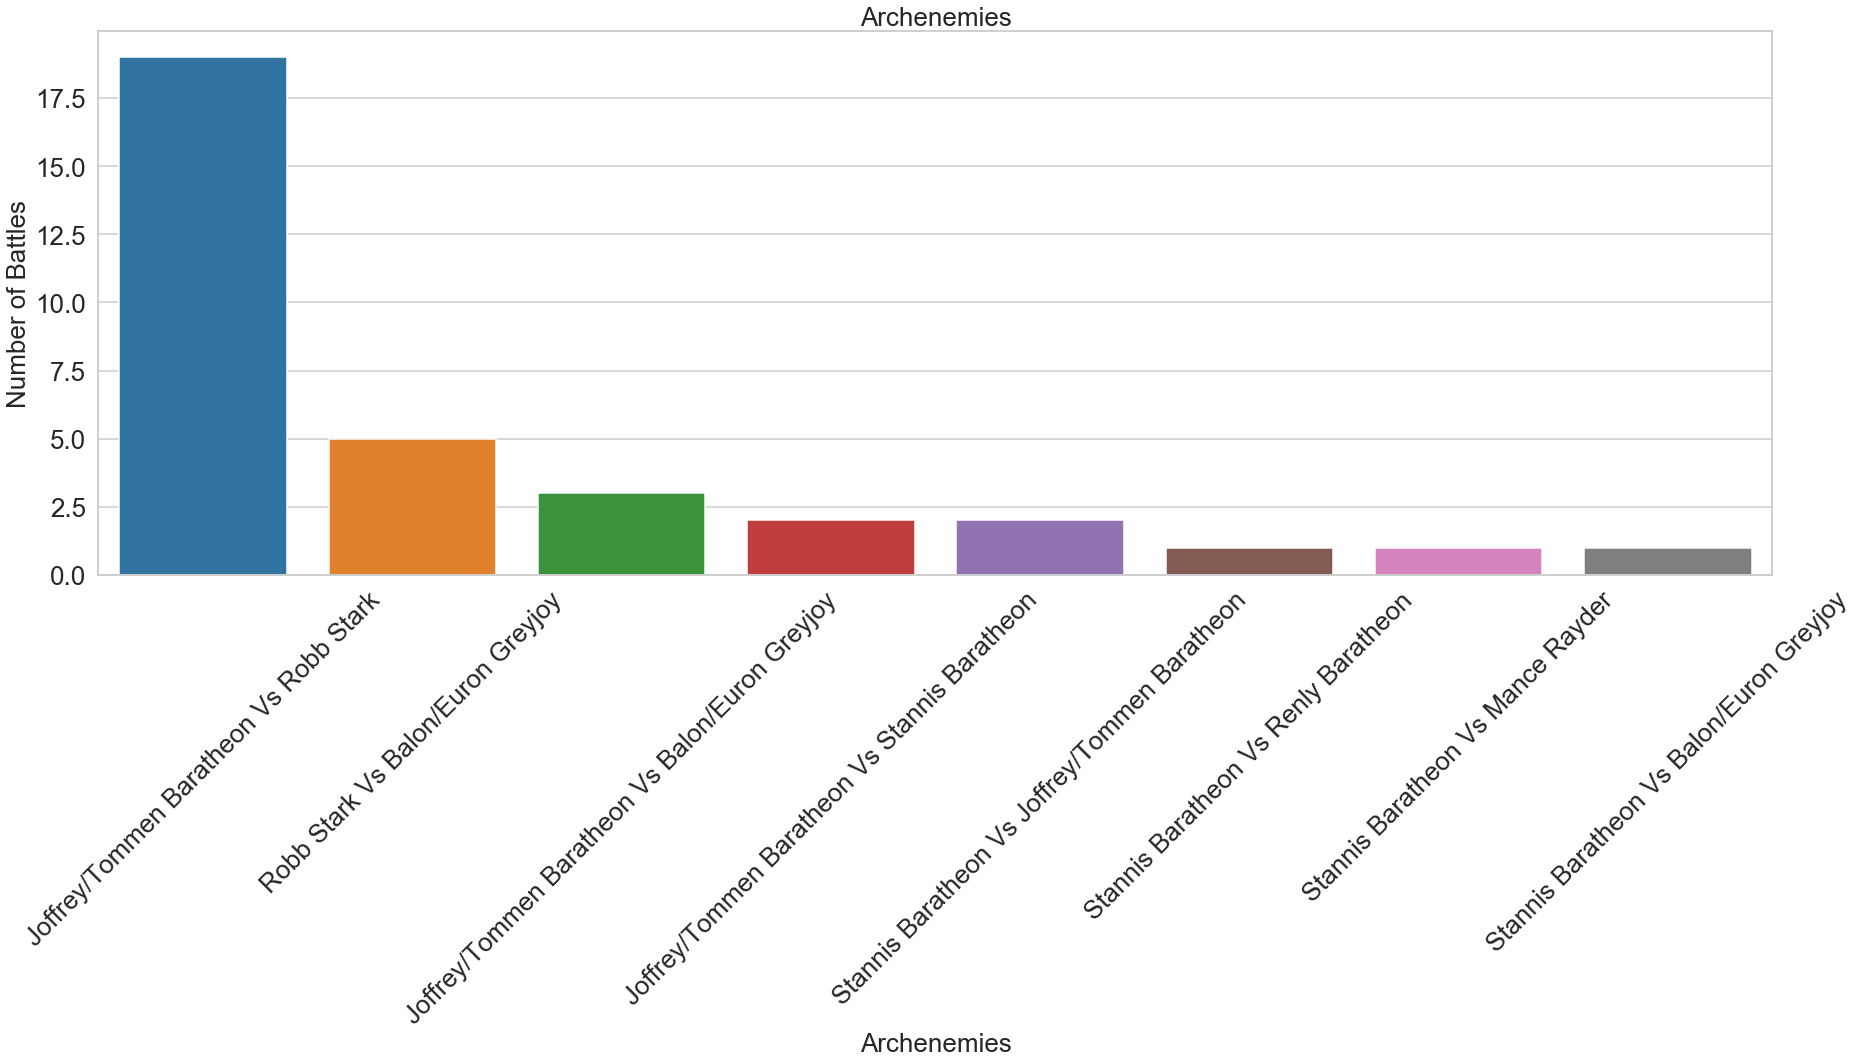

In [26]:
archenemy_df[['versus_text',
              'battle_count']].set_index('versus_text',inplace=True)
sns.barplot(data=archenemy_df,x='versus_text',y='battle_count')
plt.xticks(rotation=45)
plt.xlabel('Archenemies')
plt.ylabel('Number of Battles')
plt.title('Archenemies')
plt.show()

---
참고 : 다른 속성의 조합으로  훨씬 더 많은 탐색이 가능하다. 지금까지 한 것은 빙산의 일각에 불과하다.